# Analysis

In [1]:
import mysql.connector as connector
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm

#### Connect Database

In [2]:
conn = connector.connect(
    host="localhost",
    user="root",
    password="pass123",
    database="gp_questionnaire"
)

cursor = conn.cursor()

In [3]:
cursor.execute("SELECT reha_FA , reha_RW, reha_AE, reha_PU FROM uesscores")
reha_items = cursor.fetchall()

rehaFA, rehaRW, rehaAE, rehaPU = [], [], [], []
for row in reha_items:
    rehaFA.append(row[0])
    rehaRW.append(row[1])
    rehaAE.append(row[2])
    rehaPU.append(row[3])

print(rehaFA)
print(rehaRW)
print(rehaAE)
print(rehaPU)

[4.571428571428571, 3.857142857142857, 2.142857142857143, 2.571428571428572, 3.142857142857143, 1.714285714285714, 4.0, 3.285714285714286, 2.714285714285714, 2.714285714285714, 3.0, 4.285714285714286, 3.714285714285714, 4.142857142857143, 3.285714285714286, 1.571428571428571, 3.428571428571428, 3.0, 2.428571428571428]
[4.7, 3.9, 3.2, 3.3, 3.8, 1.8, 3.9, 4.5, 3.7, 2.7, 2.8, 4.4, 3.9, 4.1, 4.2, 1.5, 4.1, 4.1, 3.3]
[5.0, 4.0, 3.8, 4.6, 4.0, 1.4, 4.2, 4.8, 3.8, 3.4, 2.2, 4.4, 3.4, 4.0, 4.4, 2.0, 4.2, 4.0, 3.2]
[4.0, 3.75, 3.75, 2.5, 3.75, 3.75, 4.25, 3.0, 3.375, 3.375, 3.0, 3.25, 4.0, 4.0, 4.125, 3.125, 3.125, 4.0, 4.25]


In [4]:
cursor.execute("SELECT VR_FA , VR_RW, VR_AE, VR_PU FROM uesscores")
vr_items = cursor.fetchall()

vrFA, vrRW, vrAE, vrPU = [], [], [], []
for row in vr_items:
    vrFA.append(row[0])
    vrRW.append(row[1])
    vrAE.append(row[2])
    vrPU.append(row[3])

print(vrFA)
print(vrRW)
print(vrAE)
print(vrPU)

[5.0, 4.428571428571429, 3.857142857142857, 4.857142857142857, 4.857142857142857, 5.0, 4.0, 4.285714285714286, 3.571428571428572, 4.285714285714286, 4.285714285714286, 5.0, 4.714285714285714, 5.0, 4.0, 3.571428571428572, 4.857142857142857, 3.714285714285714, 4.428571428571429]
[5.0, 4.4, 4.5, 4.3, 4.6, 5.0, 4.3, 4.9, 3.9, 4.5, 4.1, 4.9, 4.9, 4.8, 4.4, 2.9, 4.3, 5.0, 4.3]
[5.0, 4.6, 4.2, 5.0, 4.6, 4.4, 4.0, 4.8, 4.2, 4.2, 3.6, 5.0, 4.8, 4.8, 4.6, 2.8, 4.4, 4.8, 4.8]
[4.125, 3.5, 4.125, 3.375, 4.25, 4.0, 3.5, 2.75, 3.875, 4.0, 3.375, 4.375, 3.375, 4.0, 3.5, 2.75, 2.875, 4.25, 4.125]


In [5]:
rehaFA_mean = sum(rehaFA) / len(rehaFA)
rehaRW_mean = sum(rehaRW) / len(rehaRW)
rehaAE_mean = sum(rehaAE) / len(rehaAE)
rehaPU_mean = sum(rehaPU) / len(rehaPU)

reha_items = [rehaFA_mean, rehaRW_mean, rehaAE_mean, rehaPU_mean]

vrFA_mean = sum(vrFA) / len(vrFA)
vrRW_mean = sum(vrRW) / len(vrRW)
vrAE_mean = sum(vrAE) / len(vrAE)
vrPU_mean = sum(vrPU) / len(vrPU)

vr_items = [vrFA_mean, vrRW_mean, vrAE_mean, vrPU_mean]

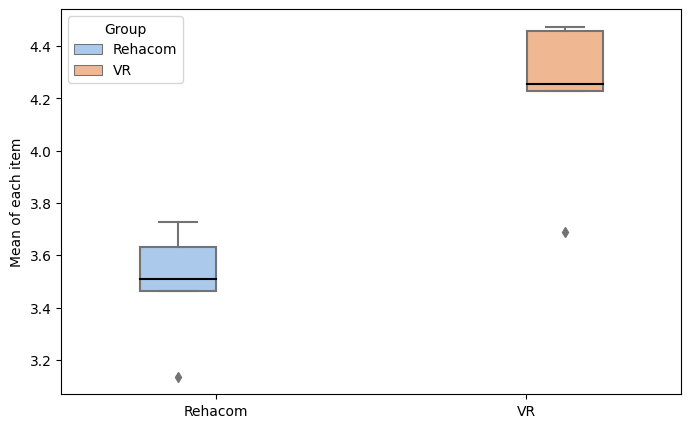

In [6]:
df = pd.DataFrame({
    'value': np.concatenate([reha_items, vr_items]),
    'group': np.repeat(['Rehacom', 'VR'], 4)
})

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='group', y='value', data=df, width=0.5, palette='pastel', hue='group', 
            showmeans=True, meanline=True, meanprops={'color': 'black', 'linewidth': '1.5', 'linestyle':'solid'}, 
            medianprops={'visible': False})

plt.xlabel('')
plt.ylabel('Mean of each item')
plt.legend(title='Group')
plt.show()

In [36]:
cursor.execute("SELECT reha_total FROM uesscores")
reha_total = cursor.fetchall()
print(reha_total)

reha_total = [item[0] for item in reha_total]
print(reha_total)
reha_mean = sum(reha_total) / len(reha_total)

# reha_mean

[(18.27142857142857,), (15.50714285714286,), (12.89285714285714,), (12.97142857142857,), (14.69285714285714,), (8.664285714285713,), (16.35,), (15.58571428571429,), (13.58928571428572,), (12.18928571428572,), (11.0,), (16.33571428571429,), (15.01428571428571,), (16.24285714285714,), (16.01071428571429,), (8.196428571428571,), (14.85357142857143,), (15.1,), (13.17857142857143,)]
[18.27142857142857, 15.50714285714286, 12.89285714285714, 12.97142857142857, 14.69285714285714, 8.664285714285713, 16.35, 15.58571428571429, 13.58928571428572, 12.18928571428572, 11.0, 16.33571428571429, 15.01428571428571, 16.24285714285714, 16.01071428571429, 8.196428571428571, 14.85357142857143, 15.1, 13.17857142857143]


In [8]:
cursor.execute("SELECT VR_total FROM uesscores")
VR_total = cursor.fetchall()

VR_total = [item[0] for item in VR_total]
vr_mean = sum(VR_total) / len(VR_total)

vr_mean

17.023120300751877

In [92]:
cursor.execute("SELECT * FROM answer WHERE dimension = 'pu';")
pudimension = cursor.fetchall()
# print(pudimension)

reha_pu_items = [[item[4] for item in pudimension if item[2] == value] for value in range(7, 15)]
vr_pu_items = [[item[5] for item in pudimension if item[2] == value] for value in range(7, 15)]

# print(reha_pu_items)
# print(vr_pu_items)
print(len(reha_pu_items) )

8


In [94]:
# plt.figure(figsize=(10, 6))


df = pd.DataFrame({
    'value': np.concatenate([reha_pu_items[0], vr_pu_items[0], reha_pu_items[1], vr_pu_items[1], reha_pu_items[2], vr_pu_items[2], reha_pu_items[3], vr_pu_items[3], reha_pu_items[4], vr_pu_items[4], reha_pu_items[5], vr_pu_items[5], reha_pu_items[6], vr_pu_items[6], reha_pu_items[7], vr_pu_items[7]]),
    'boxplot': ['rehaPU1']*len(rehaFA) + ['vrFA']*len(vrFA) + ['rehaRW']*len(rehaRW) + ['vrRW']*len(vrRW) + ['rehaAE']*len(rehaAE) + ['vrAE']*len(vrAE) + ['rehaPU']*len(rehaPU) + ['vrPU']*len(vrPU),
    'group': np.repeat(['FA', 'RW', 'AE', 'PU'], 2*len(rehaFA))
})

# df = pd.DataFrame({
#     'value': np.concatenate([rehaFA, vrFA, rehaRW, vrRW, rehaAE, vrAE, rehaPU, vrPU]),
#     'boxplot': ['rehaFA']*len(rehaFA) + ['vrFA']*len(vrFA) + ['rehaRW']*len(rehaRW) + ['vrRW']*len(vrRW) + ['rehaAE']*len(rehaAE) + ['vrAE']*len(vrAE) + ['rehaPU']*len(rehaPU) + ['vrPU']*len(vrPU),
#     'group': np.repeat(['FA', 'RW', 'AE', 'PU'], 2*len(rehaFA))
# })

palette = {
    'VR FA': 'lightblue', 'VR AE': 'lightblue', 'VR PU': 'lightblue', 'VR RW': 'lightblue',
    'Rehacom FA': 'peachpuff', 'Rehacom AE': 'peachpuff', 'Rehacom PU': 'peachpuff', 'Rehacom RW': 'peachpuff'
}

plt.figure(figsize=(8, 5))
sns.boxplot(x='group', y='value', data=df, width=0.5, palette=palette, 
            showmeans=True, meanline=True, meanprops={'color': 'black', 'linewidth': '1.5', 'linestyle':'solid'}, 
            medianprops={'visible': False})

plt.xlabel('')
plt.ylabel('Scores')
plt.title('Scores Distribution')
# plt.legend(title='Group')

plt.show()


ValueError: All arrays must be of the same length

In [ ]:
cursor.execute("SELECT * FROM answer WHERE dimension = 'pu';")
pudimension = cursor.fetchall()
# print(pudimension)

reha_pu_items = [[item[4] for item in pudimension if item[2] == value] for value in range(7, 15)]
vr_pu_items = [[item[5] for item in pudimension if item[2] == value] for value in range(7, 15)]

# print(reha_pu_items)
# print(vr_pu_items)
print(len(reha_pu_items) * len(reha_pu_items[0]))

[(31, 2, 10, 'PU', 1, 1, None), (38, 2, 8, 'PU', 2, 2, None), (40, 2, 13, 'PU', 4, 5, None), (42, 2, 12, 'PU', 4, 5, None), (43, 2, 9, 'PU', 2, 2, None), (49, 2, 14, 'PU', 2, 2, None), (54, 2, 11, 'PU', 1, 1, None), (62, 2, 7, 'PU', 2, 1, None), (66, 3, 13, 'PU', 4, 4, None), (67, 3, 11, 'PU', 3, 3, None), (68, 3, 7, 'PU', 2, 1, None), (79, 3, 12, 'PU', 4, 5, None), (81, 3, 8, 'PU', 2, 4, None), (85, 3, 9, 'PU', 1, 1, None), (91, 3, 10, 'PU', 2, 2, None), (94, 3, 14, 'PU', 2, 2, None), (98, 4, 10, 'PU', 4, 2, None), (101, 4, 9, 'PU', 2, 1, None), (103, 4, 14, 'PU', 1, 2, None), (108, 4, 13, 'PU', 3, 4, None), (109, 4, 7, 'PU', 2, 2, None), (116, 4, 12, 'PU', 2, 2, None), (122, 4, 8, 'PU', 2, 2, None), (125, 4, 11, 'PU', 2, 2, None), (141, 5, 12, 'PU', 2, 4, None), (142, 5, 14, 'PU', 4, 4, None), (145, 5, 7, 'PU', 4, 4, None), (147, 5, 13, 'PU', 3, 5, None), (149, 5, 11, 'PU', 3, 3, None), (150, 5, 9, 'PU', 4, 2, None), (163, 5, 10, 'PU', 4, 1, None), (169, 5, 8, 'PU', 4, 2, None), (173

In [78]:
cursor.execute("SELECT * FROM answer WHERE dimension = 'fa';")
fadimension = cursor.fetchall()

reha_fa_items = [[item[4] for item in fadimension if item[2] == value] for value in range(0, 7)]
vr_fa_items = [[item[5] for item in fadimension if item[2] == value] for value in range(0, 7)]

# print(reha_fa_items)
# print(vr_fa_items)
print(len(reha_fa_items) * len(reha_fa_items[0]))

[[5, 3, 1, 3, 2, 1, 4, 4, 3, 2, 2, 4, 3, 4, 4, 2, 2, 1, 3], [5, 4, 2, 2, 4, 1, 5, 3, 3, 3, 3, 5, 3, 5, 4, 3, 2, 2, 3], [4, 3, 2, 3, 4, 2, 3, 3, 2, 2, 4, 4, 4, 4, 1, 3, 2, 2, 4], [4, 5, 2, 2, 1, 2, 4, 2, 3, 2, 4, 4, 4, 4, 2, 2, 2, 2, 3], [5, 4, 2, 2, 5, 2, 5, 3, 3, 3, 3, 5, 4, 4, 4, 4, 3, 1, 4], [5, 4, 3, 3, 4, 2, 4, 3, 2, 3, 3, 4, 4, 4, 4, 4, 3, 2, 3], [4, 4, 3, 3, 2, 2, 3, 5, 3, 4, 2, 4, 4, 4, 4, 3, 3, 1, 4]]
[[5, 4, 3, 4, 5, 5, 5, 4, 3, 4, 4, 5, 5, 5, 4, 3, 5, 4, 5], [5, 5, 4, 5, 5, 5, 4, 3, 4, 5, 4, 5, 5, 5, 4, 4, 5, 3, 5], [5, 3, 4, 5, 4, 5, 3, 4, 4, 4, 5, 5, 4, 5, 4, 3, 3, 4, 5], [5, 5, 5, 5, 5, 5, 5, 4, 3, 4, 5, 5, 4, 5, 4, 3, 4, 4, 5], [5, 5, 4, 5, 5, 5, 3, 5, 3, 4, 4, 5, 5, 5, 3, 4, 5, 3, 4], [5, 5, 4, 5, 5, 5, 4, 5, 4, 4, 4, 5, 5, 5, 4, 5, 5, 3, 5], [5, 4, 3, 5, 5, 5, 4, 5, 4, 5, 4, 5, 5, 5, 5, 4, 4, 4, 5]]
133


In [77]:
cursor.execute("SELECT * FROM answer WHERE dimension = 'ae';")
aedimension = cursor.fetchall()

reha_ae_items = [[item[4] for item in aedimension if item[2] == value] for value in range(15, 20)]
vr_ae_items = [[item[5] for item in aedimension if item[2] == value] for value in range(15, 20)]

# print(reha_ae_items)
# print(vr_ae_items)
print(len(reha_ae_items) * len(reha_ae_items[0]))

[[5, 4, 3, 4, 4, 1, 4, 5, 4, 2, 2, 5, 4, 4, 5, 4, 3, 2, 4], [5, 3, 4, 5, 4, 1, 4, 4, 3, 4, 2, 5, 4, 4, 4, 4, 2, 2, 4], [5, 4, 4, 5, 4, 2, 4, 5, 4, 3, 2, 4, 2, 3, 5, 4, 4, 1, 4], [5, 4, 4, 4, 4, 1, 4, 5, 4, 4, 3, 4, 4, 5, 4, 4, 3, 3, 4], [5, 5, 4, 5, 4, 2, 5, 5, 4, 4, 2, 4, 3, 4, 4, 4, 4, 2, 5]]
[[5, 5, 4, 5, 4, 4, 4, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 3, 4], [5, 3, 4, 5, 5, 5, 4, 5, 4, 4, 4, 5, 5, 5, 4, 5, 4, 3, 4], [5, 5, 4, 5, 4, 4, 4, 5, 4, 4, 4, 5, 5, 5, 5, 4, 5, 2, 5], [5, 5, 4, 5, 5, 5, 4, 5, 4, 4, 3, 5, 4, 5, 5, 5, 5, 4, 4], [5, 5, 5, 5, 5, 4, 4, 5, 4, 4, 3, 5, 5, 4, 4, 5, 5, 2, 5]]
95


In [76]:
cursor.execute("SELECT * FROM answer WHERE dimension = 'RW';")
rwdimension = cursor.fetchall()
print(rwdimension)

reha_rw_items = [[item[4] for item in rwdimension if item[2] == value] for value in range(20, 30)]
vr_rw_items = [[item[5] for item in rwdimension if item[2] == value] for value in range(20, 30)]

print(reha_rw_items)
print(vr_rw_items)
print(len(reha_rw_items) * len(reha_rw_items[0]))

[(32, 2, 20, 'RW', 5, 5, None), (34, 2, 29, 'RW', 5, 5, None), (37, 2, 28, 'RW', 4, 5, None), (39, 2, 22, 'RW', 1, 1, None), (45, 2, 24, 'RW', 5, 5, None), (47, 2, 27, 'RW', 4, 5, None), (50, 2, 21, 'RW', 5, 5, None), (51, 2, 23, 'RW', 5, 5, None), (60, 2, 26, 'RW', 4, 5, None), (64, 2, 25, 'RW', 5, 5, None), (70, 3, 26, 'RW', 3, 5, None), (74, 3, 22, 'RW', 2, 4, None), (76, 3, 29, 'RW', 5, 5, None), (77, 3, 28, 'RW', 5, 5, None), (78, 3, 25, 'RW', 4, 5, None), (83, 3, 24, 'RW', 3, 5, None), (87, 3, 23, 'RW', 3, 4, None), (88, 3, 21, 'RW', 4, 3, None), (90, 3, 27, 'RW', 4, 5, None), (97, 3, 20, 'RW', 4, 5, None), (99, 4, 25, 'RW', 2, 5, None), (104, 4, 23, 'RW', 3, 4, None), (115, 4, 27, 'RW', 2, 4, None), (119, 4, 22, 'RW', 2, 1, None), (120, 4, 26, 'RW', 3, 4, None), (121, 4, 21, 'RW', 5, 5, None), (123, 4, 24, 'RW', 3, 5, None), (126, 4, 29, 'RW', 3, 5, None), (129, 4, 28, 'RW', 3, 4, None), (133, 4, 20, 'RW', 4, 4, None), (136, 5, 26, 'RW', 2, 5, None), (139, 5, 29, 'RW', 3, 4, Non

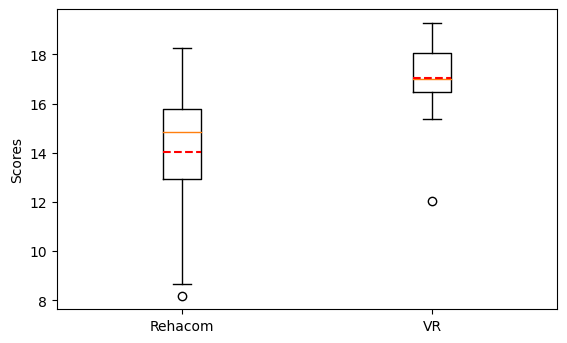

In [9]:
fig = plt.figure(figsize=(5, 3))

data = [reha_total, VR_total]

ax = fig.add_axes([0, 0, 1 ,1])
bp = ax.boxplot(data, showmeans=True, meanline=True, meanprops={'color': 'red', 'linewidth': '1.5'})

# plt.text(1, reha_mean, f'{reha_mean:.2f}', fontsize=10, ha='left', va='bottom', color='g')
# plt.text(2, vr_mean, f'{vr_mean:.2f}', fontsize=10, ha='left', va='bottom', color='g')

plt.xticks([1, 2], ['Rehacom', 'VR'])
plt.ylabel('Scores')

plt.show()

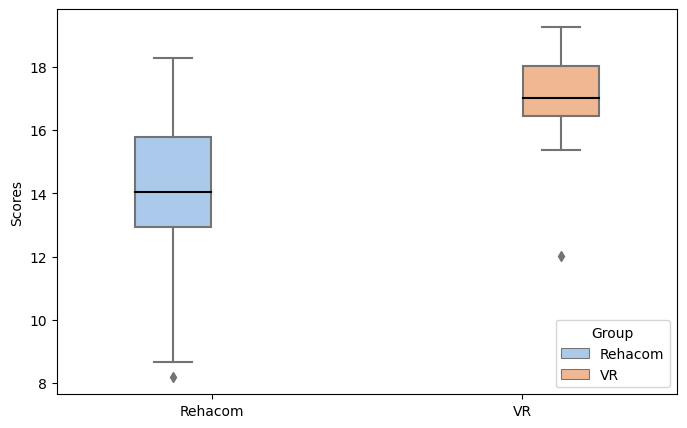

In [10]:
df = pd.DataFrame({
    'value': np.concatenate([reha_total, VR_total]),
    'group': np.repeat(['Rehacom', 'VR'], len(reha_total))
})

plt.figure(figsize=(8, 5))
sns.boxplot(x='group', y='value', data=df, width=0.5, palette='pastel', hue='group', 
            showmeans=True, meanline=True, meanprops={'color': 'black', 'linewidth': '1.5', 'linestyle':'solid'}, 
            medianprops={'visible': False})

plt.xlabel('')
plt.ylabel('Scores')
plt.legend(title='Group')

plt.show()

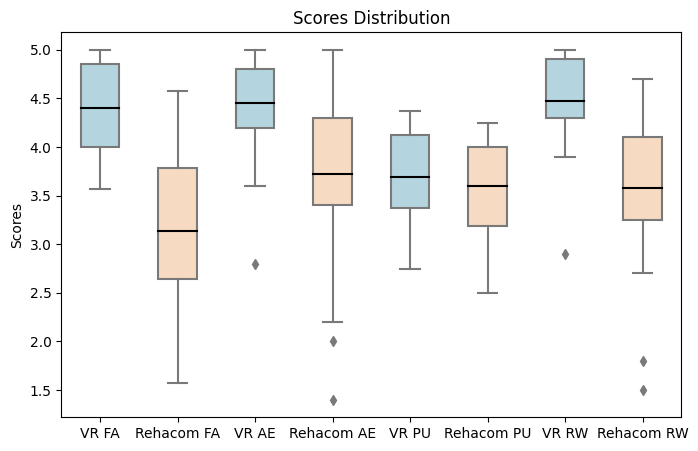

In [27]:
df = pd.DataFrame({
    'value': np.concatenate([vrFA, rehaFA, vrAE, rehaAE, vrPU, rehaPU, vrRW, rehaRW]),
    'group': np.repeat(['VR FA', 'Rehacom FA', 'VR AE', 'Rehacom AE',  'VR PU', 'Rehacom PU', 'VR RW', 'Rehacom RW'], len(reha_total))
})

palette = {
    'VR FA': 'lightblue', 'VR AE': 'lightblue', 'VR PU': 'lightblue', 'VR RW': 'lightblue',
    'Rehacom FA': 'peachpuff', 'Rehacom AE': 'peachpuff', 'Rehacom PU': 'peachpuff', 'Rehacom RW': 'peachpuff'
}

plt.figure(figsize=(8, 5))
sns.boxplot(x='group', y='value', data=df, width=0.5, palette=palette, 
            showmeans=True, meanline=True, meanprops={'color': 'black', 'linewidth': '1.5', 'linestyle':'solid'}, 
            medianprops={'visible': False})

plt.xlabel('')
plt.ylabel('Scores')
plt.title('Scores Distribution')
# plt.legend(title='Group')

plt.show()

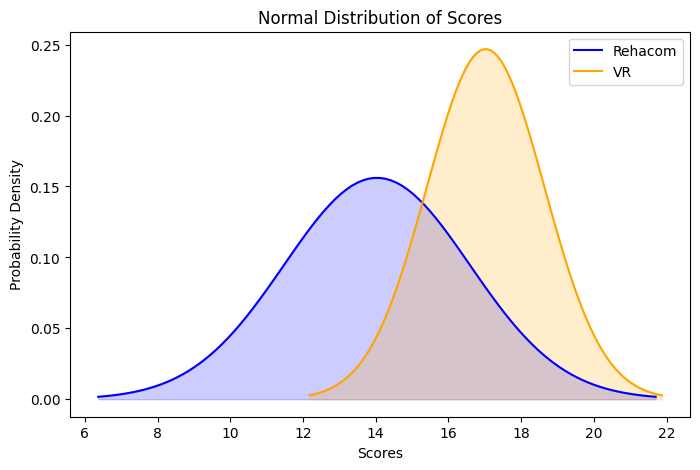

In [11]:
reha_mean, reha_std = np.mean(reha_total), np.std(reha_total)
vr_mean, vr_std = np.mean(VR_total), np.std(VR_total)

# Generate x values for the bell curve
x_reha = np.linspace(reha_mean - 3*reha_std, reha_mean + 3*reha_std, 100)
x_vr = np.linspace(vr_mean - 3*vr_std, vr_mean + 3*vr_std, 100)

# Generate y values for the bell curve
y_reha = norm.pdf(x_reha, reha_mean, reha_std)
y_vr = norm.pdf(x_vr, vr_mean, vr_std)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_reha, y_reha, label='Rehacom', color='blue')
plt.plot(x_vr, y_vr, label='VR', color='orange')
plt.fill_between(x_reha, y_reha, alpha=0.2, color='blue')
plt.fill_between(x_vr, y_vr, alpha=0.2, color='orange')

plt.xlabel('Scores')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of Scores')
plt.legend()
plt.show()